# Recommendations Project

In [1]:
# Import all necessary libraries
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline 
import seaborn as sns

In [2]:
# Reading the csv files
os.chdir = ("/Users/kishorekumarg/Documents/Great Learning/GL - Recommendation systems/GL - Recommendation system Project")

In [3]:
# Finding the csv files in the folder and putting them in list
import glob
ext = "csv"
all_filenames = [i for i in glob.glob('*.{}'.format(ext))]

In [4]:
# Using list read and merge
dat1 = []
for a in all_filenames:
    dat1.append(pd.read_csv(a,engine = 'python'))
merged_df = pd.concat(dat1)

In [5]:
merged_df.shape
# data_sample.shape

(1415133, 11)

In [6]:
merged_df.columns

Index(['phone_url', 'date', 'lang', 'country', 'source', 'domain', 'score',
       'score_max', 'extract', 'author', 'product'],
      dtype='object')

In [7]:
merged_df.head()

,phone_url,date,lang,country,source,domain,score,score_max,extract,author,product
0,/cellphones/samsung-galaxy-s8/,5/2/2017,en,us,Verizon Wireless,verizonwireless.com,10.0,10.0,As a diehard Samsung fan who has had every Sam...,CarolAnn35,Samsung Galaxy S8
1,/cellphones/samsung-galaxy-s8/,4/28/2017,en,us,Phone Arena,phonearena.com,10.0,10.0,Love the phone. the phone is sleek and smooth ...,james0923,Samsung Galaxy S8
2,/cellphones/samsung-galaxy-s8/,5/4/2017,en,us,Amazon,amazon.com,6.0,10.0,Adequate feel. Nice heft. Processor's still sl...,R. Craig,"Samsung Galaxy S8 (64GB) G950U 5.8"" 4G LTE Unl..."
3,/cellphones/samsung-galaxy-s8/,5/2/2017,en,us,Samsung,samsung.com,9.2,10.0,Never disappointed. One of the reasons I've be...,Buster2020,Samsung Galaxy S8 64GB (AT&T)
4,/cellphones/samsung-galaxy-s8/,5/11/2017,en,us,Verizon Wireless,verizonwireless.com,4.0,10.0,I've now found that i'm in a group of people t...,S Ate Mine,Samsung Galaxy S8


In [8]:
# Shape of the data
merged_df.shape
rows = len(merged_df)
columns = len(merged_df.columns)
print("Summary")
print("No.of Rows = ", rows )
print("No.of Columns = ", columns)

Summary
No.of Rows =  1415133
No.of Columns =  11


In [9]:
#Data Types
merged_df.dtypes

phone_url     object
date          object
lang          object
country       object
source        object
domain        object
score        float64
score_max    float64
extract       object
author        object
product       object
dtype: object

In [10]:
merged_df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
score,1351644.0,8.00706,2.616121,0.2,7.2,9.2,10.0,10.0
score_max,1351644.0,10.00000,0.000000,10.0,10.0,10.0,10.0,10.0


In [11]:
# Finding the unique values present in all columns
merged_df.nunique(axis=0)

phone_url       5556
date            7728
lang              22
country           42
source           331
domain           384
score             86
score_max          1
extract      1321353
author        801103
product        61313
dtype: int64

In [12]:
def find_uniquevalue_df(a,b):
    # Finding unique value for score_max
    print('No.of unique values for ',b,a.nunique())
    # Finding unique value for score_max
    print('Unique values for',b,a.unique())

In [13]:
for i in merged_df.columns:
    find_uniquevalue_df(merged_df[i],i)

No.of unique values for  phone_url 5556
Unique values for phone_url ['/cellphones/samsung-galaxy-s8/'
 '/cellphones/samsung-galaxy-s6-edgeplus/'
 '/cellphones/samsung-galaxy-s8-plus/' ... '/cellphones/lg-secret-kf750/'
 '/cellphones/samsung-sch-u350/' '/cellphones/sony-ericsson-z710i/']
No.of unique values for  date 7728
Unique values for date ['5/2/2017' '4/28/2017' '5/4/2017' ... '12/4/2017' '1/1/1970' '12/16/1999']
No.of unique values for  lang 22
Unique values for lang ['en' 'he' 'fi' 'it' 'no' 'nl' 'ru' 'cs' 'sv' 'es' 'pt' 'fr' 'de' 'da'
 'tr' 'pl' 'hu' 'ar' 'id' 'zh' 'ja' 'ko']
No.of unique values for  country 42
Unique values for country ['us' 'gb' 'au' 'in' 'il' 'fi' 'it' 'no' 'nl' 'ru' 'cz' 'be' 'se' 'es'
 'br' 'fr' 'ua' 'ca' 'de' 'dk' 'nz' 'tr' 'pl' 'ch' 'pt' 'hu' 'za' 'mx'
 'ae' 'id' 've' 'sg' 'cl' 'ar' 'ec' 'co' 'uy' 'cn' 'pe' 'jp' 'kr' 'tw']
No.of unique values for  source 331
Unique values for source ['Verizon Wireless' 'Phone Arena' 'Amazon' 'Samsung' 'Very' 'CNET'
 'Wir

No.of unique values for  extract 1321353
Unique values for extract ['As a diehard Samsung fan who has had every Samsung phone since before the S series started, this has been my favorite upgrade so far. I am amazed at some of the reviews and think people may just have a defective device that needs to be replaced. The battery life is amazing.'
 'Love the phone. the phone is sleek and smooth and beautiful I highly recommend the phone you will not regret getting this phone.'
 "Adequate feel. Nice heft. Processor's still sluggish for the few apps that I have installed. Samsung wants to vacuum all of your data with their apps that requires more access than needed. What else is new."
 ...
 'Pour les gens qui ne regarde pas Il fait mp3, possedant un z600 depuis 2ans puis un p910 je revient au z car ils ont un desing terrible et je suis un...'
 'C vrai que sans le mp3 c moyen...' 'Il lui manque le mp3 quel dommage']
No.of unique values for  author 801103
Unique values for author ['CarolAnn35' 

In [14]:
def find_uniquevalue(a):
    # Finding unique value for score_max
    print('No.of unique values for ',a.nunique())
    # Finding unique value for score_max
    print('Unique values for',a.unique())
# Unique Value of country
find_uniquevalue(merged_df['country'])  

No.of unique values for  42
Unique values for ['us' 'gb' 'au' 'in' 'il' 'fi' 'it' 'no' 'nl' 'ru' 'cz' 'be' 'se' 'es'
 'br' 'fr' 'ua' 'ca' 'de' 'dk' 'nz' 'tr' 'pl' 'ch' 'pt' 'hu' 'za' 'mx'
 'ae' 'id' 've' 'sg' 'cl' 'ar' 'ec' 'co' 'uy' 'cn' 'pe' 'jp' 'kr' 'tw']


In [15]:
merged_df[(merged_df['country'] == 'us')]

,phone_url,date,lang,country,source,domain,score,score_max,extract,author,product
0,/cellphones/samsung-galaxy-s8/,5/2/2017,en,us,Verizon Wireless,verizonwireless.com,10.0,10.0,As a diehard Samsung fan who has had every Sam...,CarolAnn35,Samsung Galaxy S8
1,/cellphones/samsung-galaxy-s8/,4/28/2017,en,us,Phone Arena,phonearena.com,10.0,10.0,Love the phone. the phone is sleek and smooth ...,james0923,Samsung Galaxy S8
2,/cellphones/samsung-galaxy-s8/,5/4/2017,en,us,Amazon,amazon.com,6.0,10.0,Adequate feel. Nice heft. Processor's still sl...,R. Craig,"Samsung Galaxy S8 (64GB) G950U 5.8"" 4G LTE Unl..."
3,/cellphones/samsung-galaxy-s8/,5/2/2017,en,us,Samsung,samsung.com,9.2,10.0,Never disappointed. One of the reasons I've be...,Buster2020,Samsung Galaxy S8 64GB (AT&T)
4,/cellphones/samsung-galaxy-s8/,5/11/2017,en,us,Verizon Wireless,verizonwireless.com,4.0,10.0,I've now found that i'm in a group of people t...,S Ate Mine,Samsung Galaxy S8
...,...,...,...,...,...,...,...,...,...,...,...
350084,/cellphones/samsung-sch-u350/,7/19/2009,en,us,HandCellPhone,handcellphone.com,NaN,NaN,What? What about the phone? Geezzz,Frank,Samsung Smooth SCH-U350
350085,/cellphones/samsung-sch-u350/,5/10/2009,en,us,HandCellPhone,handcellphone.com,NaN,NaN,well i wish if i had a phone right know becaus...,murissaferrier,Samsung Smooth SCH-U350
350086,/cellphones/samsung-sch-u350/,4/27/2009,en,us,Phone Arena,phonearena.com,9.7,10.0,this is the very best basic phone verizon has ...,mudslinger83,Samsung Smooth
350087,/cellphones/samsung-sch-u350/,4/27/2009,en,us,Phone Scoop,phonescoop.com,10.0,10.0,this is the very best basic phone verizon has ...,mudslinger83,Smooth / Glint SCH-U350


In [16]:
merged_df.nunique(axis=0)
merged_df.describe().apply(lambda s: s.apply(lambda x: format(x, 'f')))

,score,score_max
count,1351644.000000,1351644.000000
mean,8.007060,10.000000
std,2.616121,0.000000
min,0.200000,10.000000
25%,7.200000,10.000000
50%,9.200000,10.000000
75%,10.000000,10.000000
max,10.000000,10.000000


In [17]:
merged_df1 = merged_df['score'].apply(np.ceil) 
print (merged_df1)

0         10.0
1         10.0
2          6.0
3         10.0
4          4.0
          ... 
350211    10.0
350212     9.0
350213    10.0
350214     9.0
350215    10.0
Name: score, Length: 1415133, dtype: float64


In [18]:
merged_dfcopy = merged_df.copy()
merged_dfcopy.head()

,phone_url,date,lang,country,source,domain,score,score_max,extract,author,product
0,/cellphones/samsung-galaxy-s8/,5/2/2017,en,us,Verizon Wireless,verizonwireless.com,10.0,10.0,As a diehard Samsung fan who has had every Sam...,CarolAnn35,Samsung Galaxy S8
1,/cellphones/samsung-galaxy-s8/,4/28/2017,en,us,Phone Arena,phonearena.com,10.0,10.0,Love the phone. the phone is sleek and smooth ...,james0923,Samsung Galaxy S8
2,/cellphones/samsung-galaxy-s8/,5/4/2017,en,us,Amazon,amazon.com,6.0,10.0,Adequate feel. Nice heft. Processor's still sl...,R. Craig,"Samsung Galaxy S8 (64GB) G950U 5.8"" 4G LTE Unl..."
3,/cellphones/samsung-galaxy-s8/,5/2/2017,en,us,Samsung,samsung.com,9.2,10.0,Never disappointed. One of the reasons I've be...,Buster2020,Samsung Galaxy S8 64GB (AT&T)
4,/cellphones/samsung-galaxy-s8/,5/11/2017,en,us,Verizon Wireless,verizonwireless.com,4.0,10.0,I've now found that i'm in a group of people t...,S Ate Mine,Samsung Galaxy S8


In [19]:
merged_df1.head()

0    10.0
1    10.0
2     6.0
3    10.0
4     4.0
Name: score, dtype: float64

In [20]:
# Rounding off the score column
merged_df['score'] = merged_df['score'].apply(lambda x: round(x, 0))

In [21]:
merged_df.head()

,phone_url,date,lang,country,source,domain,score,score_max,extract,author,product
0,/cellphones/samsung-galaxy-s8/,5/2/2017,en,us,Verizon Wireless,verizonwireless.com,10.0,10.0,As a diehard Samsung fan who has had every Sam...,CarolAnn35,Samsung Galaxy S8
1,/cellphones/samsung-galaxy-s8/,4/28/2017,en,us,Phone Arena,phonearena.com,10.0,10.0,Love the phone. the phone is sleek and smooth ...,james0923,Samsung Galaxy S8
2,/cellphones/samsung-galaxy-s8/,5/4/2017,en,us,Amazon,amazon.com,6.0,10.0,Adequate feel. Nice heft. Processor's still sl...,R. Craig,"Samsung Galaxy S8 (64GB) G950U 5.8"" 4G LTE Unl..."
3,/cellphones/samsung-galaxy-s8/,5/2/2017,en,us,Samsung,samsung.com,9.0,10.0,Never disappointed. One of the reasons I've be...,Buster2020,Samsung Galaxy S8 64GB (AT&T)
4,/cellphones/samsung-galaxy-s8/,5/11/2017,en,us,Verizon Wireless,verizonwireless.com,4.0,10.0,I've now found that i'm in a group of people t...,S Ate Mine,Samsung Galaxy S8


In [22]:
# Check for missing values
merged_df.apply(lambda x: sum(x.isnull()),axis=0)

phone_url        0
date             0
lang             0
country          0
source           0
domain           0
score        63489
score_max    63489
extract      19361
author       63202
product          1
dtype: int64

In [23]:
# dropping missing Values
merged_df_notnull = merged_df.dropna()

In [24]:
# Check for missing values
merged_df_notnull.apply(lambda x: sum(x.isnull()),axis=0)

phone_url    0
date         0
lang         0
country      0
source       0
domain       0
score        0
score_max    0
extract      0
author       0
product      0
dtype: int64

In [25]:
data_clean = merged_df_notnull.copy()

In [26]:
merged_df.shape
rows = len(merged_df)
columns = len(merged_df.columns)
print("Original Data Summary")
print("No.of Rows = ", rows )
print("No.of Columns = ", columns)

data_clean.shape
rows = len(data_clean)
columns = len(data_clean.columns)
print("Cleaned Data Summary")
print("No.of Rows = ", rows )
print("No.of Columns = ", columns)

Original Data Summary
No.of Rows =  1415133
No.of Columns =  11
Cleaned Data Summary
No.of Rows =  1275917
No.of Columns =  11


In [27]:
# Handling missing data with Imputational techniques
merged_df.apply(lambda x: sum(x.isnull()),axis=0)

phone_url        0
date             0
lang             0
country          0
source           0
domain           0
score        63489
score_max    63489
extract      19361
author       63202
product          1
dtype: int64

In [28]:

# Seems to be be we have score, score_max, extract, author, product has Missing values
# score_max - as already analyzed it has one uniue value as "10" so we can fill the na values 
# with that particular unique value
merged_df_impute1 = merged_df.copy()
merged_df_impute1['score_max'] = merged_df_impute1['score_max'].fillna(10)
merged_df_impute1.head()

,phone_url,date,lang,country,source,domain,score,score_max,extract,author,product
0,/cellphones/samsung-galaxy-s8/,5/2/2017,en,us,Verizon Wireless,verizonwireless.com,10.0,10.0,As a diehard Samsung fan who has had every Sam...,CarolAnn35,Samsung Galaxy S8
1,/cellphones/samsung-galaxy-s8/,4/28/2017,en,us,Phone Arena,phonearena.com,10.0,10.0,Love the phone. the phone is sleek and smooth ...,james0923,Samsung Galaxy S8
2,/cellphones/samsung-galaxy-s8/,5/4/2017,en,us,Amazon,amazon.com,6.0,10.0,Adequate feel. Nice heft. Processor's still sl...,R. Craig,"Samsung Galaxy S8 (64GB) G950U 5.8"" 4G LTE Unl..."
3,/cellphones/samsung-galaxy-s8/,5/2/2017,en,us,Samsung,samsung.com,9.0,10.0,Never disappointed. One of the reasons I've be...,Buster2020,Samsung Galaxy S8 64GB (AT&T)
4,/cellphones/samsung-galaxy-s8/,5/11/2017,en,us,Verizon Wireless,verizonwireless.com,4.0,10.0,I've now found that i'm in a group of people t...,S Ate Mine,Samsung Galaxy S8


In [29]:
find_uniquevalue(merged_df_impute1['score_max'])

No.of unique values for  1
Unique values for [10.]


In [30]:
def missingvalue(a):
    out = a.apply(lambda x: sum(x.isnull()),axis=0)
    return out

In [31]:
missingvalue(merged_df_impute1)

phone_url        0
date             0
lang             0
country          0
source           0
domain           0
score        63489
score_max        0
extract      19361
author       63202
product          1
dtype: int64

In [32]:
merged_df_impute2 = merged_df_impute1.copy()

# Dropping Nan in 2 columns extract and author
merged_df_impute2 = merged_df_impute2.dropna(subset=['extract', 'author'])

#validating missing value
print("Before dropping NA in extract and author columns")
missingvalue(merged_df_impute1)
print("After dropping NA in extract and author columns")
missingvalue(merged_df_impute2)

Before dropping NA in extract and author columns
After dropping NA in extract and author columns


phone_url        0
date             0
lang             0
country          0
source           0
domain           0
score        60499
score_max        0
extract          0
author           0
product          0
dtype: int64

In [33]:
merged_df_impute2.head()

,phone_url,date,lang,country,source,domain,score,score_max,extract,author,product
0,/cellphones/samsung-galaxy-s8/,5/2/2017,en,us,Verizon Wireless,verizonwireless.com,10.0,10.0,As a diehard Samsung fan who has had every Sam...,CarolAnn35,Samsung Galaxy S8
1,/cellphones/samsung-galaxy-s8/,4/28/2017,en,us,Phone Arena,phonearena.com,10.0,10.0,Love the phone. the phone is sleek and smooth ...,james0923,Samsung Galaxy S8
2,/cellphones/samsung-galaxy-s8/,5/4/2017,en,us,Amazon,amazon.com,6.0,10.0,Adequate feel. Nice heft. Processor's still sl...,R. Craig,"Samsung Galaxy S8 (64GB) G950U 5.8"" 4G LTE Unl..."
3,/cellphones/samsung-galaxy-s8/,5/2/2017,en,us,Samsung,samsung.com,9.0,10.0,Never disappointed. One of the reasons I've be...,Buster2020,Samsung Galaxy S8 64GB (AT&T)
4,/cellphones/samsung-galaxy-s8/,5/11/2017,en,us,Verizon Wireless,verizonwireless.com,4.0,10.0,I've now found that i'm in a group of people t...,S Ate Mine,Samsung Galaxy S8


array([[<AxesSubplot:title={'center':'score'}>]], dtype=object)

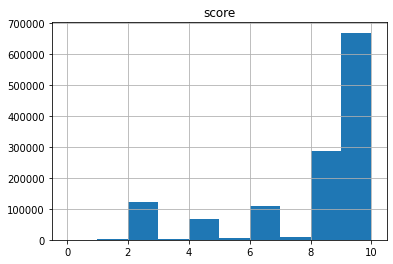

In [34]:
merged_df_impute2.hist(column='score')

In [35]:
# claculating 5 percent of data for score
score_count = merged_df_impute2['score'].count()
percent_score_count = score_count * (5/100)
print (percent_score_count)

63795.850000000006


In [36]:
# Taking a copy of dataframe before imputation
merged_df_impute3 = merged_df_impute2.copy()

In [37]:
# Filling with mean
merged_df_impute3['score'] = merged_df_impute3['score'].fillna(merged_df_impute3['score'].mean())

In [38]:
#validating missing value
print("Before dropping NA in extract and author columns")
missingvalue(merged_df_impute2)
print("After dropping NA in extract and author columns")
missingvalue(merged_df_impute3)

Before dropping NA in extract and author columns
After dropping NA in extract and author columns


phone_url    0
date         0
lang         0
country      0
source       0
domain       0
score        0
score_max    0
extract      0
author       0
product      0
dtype: int64

In [39]:
# Given that we dont have any missing values - we will drop insignificant atrributes of data
merged_df_impute3.shape

(1336416, 11)

In [40]:
# Dropping duplicate values
merged_df_impute4 = pd.DataFrame.drop_duplicates(merged_df_impute3)

In [41]:
merged_df_impute4.shape

(1331593, 11)

In [42]:
merged_df_impute3.columns

Index(['phone_url', 'date', 'lang', 'country', 'source', 'domain', 'score',
       'score_max', 'extract', 'author', 'product'],
      dtype='object')

In [43]:
merged_df_impute3.head()

,phone_url,date,lang,country,source,domain,score,score_max,extract,author,product
0,/cellphones/samsung-galaxy-s8/,5/2/2017,en,us,Verizon Wireless,verizonwireless.com,10.0,10.0,As a diehard Samsung fan who has had every Sam...,CarolAnn35,Samsung Galaxy S8
1,/cellphones/samsung-galaxy-s8/,4/28/2017,en,us,Phone Arena,phonearena.com,10.0,10.0,Love the phone. the phone is sleek and smooth ...,james0923,Samsung Galaxy S8
2,/cellphones/samsung-galaxy-s8/,5/4/2017,en,us,Amazon,amazon.com,6.0,10.0,Adequate feel. Nice heft. Processor's still sl...,R. Craig,"Samsung Galaxy S8 (64GB) G950U 5.8"" 4G LTE Unl..."
3,/cellphones/samsung-galaxy-s8/,5/2/2017,en,us,Samsung,samsung.com,9.0,10.0,Never disappointed. One of the reasons I've be...,Buster2020,Samsung Galaxy S8 64GB (AT&T)
4,/cellphones/samsung-galaxy-s8/,5/11/2017,en,us,Verizon Wireless,verizonwireless.com,4.0,10.0,I've now found that i'm in a group of people t...,S Ate Mine,Samsung Galaxy S8


In [44]:
merged_df_impute3 = merged_df_impute3.drop(['domain', 'phone_url'], axis = 1) 


In [45]:
# • Keep only 1000000 data samples. Use random state=612.
merged_df_impute3a = merged_df_impute3.copy()

In [46]:
merged_df_impute3a.head()

,date,lang,country,source,score,score_max,extract,author,product
0,5/2/2017,en,us,Verizon Wireless,10.0,10.0,As a diehard Samsung fan who has had every Sam...,CarolAnn35,Samsung Galaxy S8
1,4/28/2017,en,us,Phone Arena,10.0,10.0,Love the phone. the phone is sleek and smooth ...,james0923,Samsung Galaxy S8
2,5/4/2017,en,us,Amazon,6.0,10.0,Adequate feel. Nice heft. Processor's still sl...,R. Craig,"Samsung Galaxy S8 (64GB) G950U 5.8"" 4G LTE Unl..."
3,5/2/2017,en,us,Samsung,9.0,10.0,Never disappointed. One of the reasons I've be...,Buster2020,Samsung Galaxy S8 64GB (AT&T)
4,5/11/2017,en,us,Verizon Wireless,4.0,10.0,I've now found that i'm in a group of people t...,S Ate Mine,Samsung Galaxy S8


In [47]:
merged_df_impute3a = merged_df_impute3a.sample(n=1000000, random_state = 612)

In [48]:
merged_df_impute3a.shape

(1000000, 9)

In [49]:
merged_df_impute3a.head()

,date,lang,country,source,score,score_max,extract,author,product
52717,3/31/2014,ru,ru,Yandex,8.0,10.0,Ничего сверх крутого в apple для себя не откры...,Гундарев Сергей,Apple iPhone 5S 32Gb
233874,9/11/2016,de,de,Amazon,10.0,10.0,Handy ladet nur wenn ich Akku herausnehme wie ...,Rosemarie Boeshans,"Samsung Galaxy S3 mini I8190 Smartphone (10,2 ..."
171116,5/28/2015,it,it,Amazon,10.0,10.0,"Ottimo prodotto, a questo prezzo non esiste ni...",Federico Minetti,"Honor 4X Smartphone 4G, Display 5.5 Pollici, P..."
18964,8/6/2016,pt,br,Kabum,10.0,10.0,Òtima relação custo benefício.,Eugênio,Smartphone Samsung Galaxy J1 Mini Duos SM-J105...
53871,28/6/2012,en,us,Amazon,2.0,10.0,The phone that they send to you not correspond...,davisdev,"HTC One X Unlocked Gsm Phone, 16GB, Gray"


In [50]:
# # we will use imputation technique MICE since score is a significant attribute for this recommendation system

# import miceforest as mf

# merged_df_impute4 = mf.ampute_data(merged_df_impute3,perc=0.25,random_state=1991)

# # Create kernels. 
# kernel = mf.MultipleImputedKernel(
#   data=merged_df_impute4,
#   save_all_iterations=True,
#   random_state=1991
# )

# # Run the MICE algorithm for 3 iterations on each of the datasets
# kernel.mice(3,verbose=True)

In [51]:
# kernel.plot_correlations(wspace=0.4,hspace=0.5)

In [52]:
merged_df_impute3a.head()

,date,lang,country,source,score,score_max,extract,author,product
52717,3/31/2014,ru,ru,Yandex,8.0,10.0,Ничего сверх крутого в apple для себя не откры...,Гундарев Сергей,Apple iPhone 5S 32Gb
233874,9/11/2016,de,de,Amazon,10.0,10.0,Handy ladet nur wenn ich Akku herausnehme wie ...,Rosemarie Boeshans,"Samsung Galaxy S3 mini I8190 Smartphone (10,2 ..."
171116,5/28/2015,it,it,Amazon,10.0,10.0,"Ottimo prodotto, a questo prezzo non esiste ni...",Federico Minetti,"Honor 4X Smartphone 4G, Display 5.5 Pollici, P..."
18964,8/6/2016,pt,br,Kabum,10.0,10.0,Òtima relação custo benefício.,Eugênio,Smartphone Samsung Galaxy J1 Mini Duos SM-J105...
53871,28/6/2012,en,us,Amazon,2.0,10.0,The phone that they send to you not correspond...,davisdev,"HTC One X Unlocked Gsm Phone, 16GB, Gray"


In [53]:
# Lets find some insights in data

# Identify the most rated features of a mobile phone.
most_rated_phones = []
most_rated_phones = merged_df_impute3a.groupby('product')['score'].mean().sort_values(ascending=False).head()  
print (most_rated_phones)

product
Samsung E1200i Keystone 2 Mobile Phone (Vodafone Pay as you go, Black)      10.0
Sony Ericsson CS8                                                           10.0
Samsung Galaxy Note 5 Duos                                                  10.0
LG K4 Branco Dual Chip Android 5.1 Lollipop 4G Wi-Fi Quad Core Tela 4.5"    10.0
Samsung Galaxy Note 5 Duos 32Gb                                             10.0
Name: score, dtype: float64


In [54]:
# Identify the users with most number of reviews.
most_rated_user = []
most_rated_user = merged_df_impute3a.groupby('author')['score'].mean().sort_values(ascending=False).head()
print (most_rated_user)

author
��������� X�� �������_���������_������'m �����������...�������3 ������ ����'    10.0
OlgaMax66                                                                       10.0
Olga1                                                                           10.0
Olga280384                                                                      10.0
Olga37                                                                          10.0
Name: score, dtype: float64


In [55]:
# Select the data with products having more than 50 ratings and users who have given more than 50 ratings. Report the shape of the finaldataset.
# Products with > 50 ratings
# Users given > 50 ratings
ratings_mean_count = pd.DataFrame(merged_df_impute3a.groupby('product')['score'].mean())
ratings_mean_count['rating_counts'] = pd.DataFrame(merged_df_impute3a.groupby('product')['score'].count())
ratings_mean_count.head()


,score,rating_counts
product,,
"'Smartphone Meizu Pro 5, 5,7 pouces avec Exynos 7420 Octa 8 Core Processeur. mémoire RAM 4 Go et 64 Go mémoire...",8.000000,1
"'Sony Xperia X (F5122) – rosa – Dual Sim (Google Android 6.0.1, 5 Display, 2 x CORTEX A72 1.8 GHz + 4 x cortex-a53...",10.000000,1
"(CUBOT) GT88 5.5"" qHD 1.3GHz MTK6572 2-Core Android 4.2.2 3G Phone 8MP CAM 512MB RAM 4GB ROM",8.000000,1
"(DG300 Versione Aggiornata)5'' DOOGEE VOYAGER2 DG310 Dual Flashlights IPS Screen 3G Smartphone Android 4.4 MTK6582 1.3GHz Quad Core Telefono Cellulare Dual SIM 8G ROM OTG OTA GPS WIFI, BIANCO",7.529412,34
(Part 2) Lenovo VIBE X2,8.009546,1


In [56]:
ratings_mean_count1 = pd.DataFrame(ratings_mean_count.loc[ratings_mean_count['rating_counts'] > 50])
ratings_gt_50 = ratings_mean_count1.sort_values(by='rating_counts',ascending=False)
print(ratings_gt_50)

                                                       score  rating_counts
product                                                                    
Lenovo Vibe K4 Note (White,16GB)                    7.188005           3835
Lenovo Vibe K4 Note (Black, 16GB)                   7.206718           3275
OnePlus 3 (Graphite, 64 GB)                         8.720052           3097
OnePlus 3 (Soft Gold, 64 GB)                        8.502806           2673
Samsung Galaxy Express I8730                        8.239654           1989
...                                                      ...            ...
Lenovo P700i                                        7.725490             51
BlackBerry 9100 Pearl 3G Unlocked Phone with 3 ...  7.607843             51
Lenovo Motorola RAZR i Smartphone (10,9 cm (4,3...  8.078431             51
Nokia X3-02 Touch and Type                          7.686275             51
Nokia E65 Symbian OS 9.1 / Series 60 3rd Edition    7.725490             51

[4357 rows 

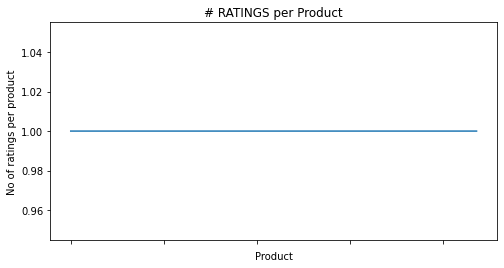

In [57]:

no_of_ratings_per_product = ratings_gt_50.groupby(by='product')['rating_counts'].count().sort_values(ascending=False)

fig = plt.figure(figsize=plt.figaspect(.5))
ax = plt.gca()
plt.plot(no_of_ratings_per_product.values)
plt.title('# RATINGS per Product')
plt.xlabel('Product')
plt.ylabel('No of ratings per product')
ax.set_xticklabels([])

plt.show()

In [58]:
no_of_ratings_per_product

product
טלפון סלולרי Xiaomi Redmi Note 3 Pro 32GB                                                                                       1
LG Optimus L5 Dual E615                                                                                                         1
LG Optimus G Pro E988                                                                                                           1
LG Optimus Hub                                                                                                                  1
LG Optimus L3 E400                                                                                                              1
                                                                                                                               ..
Samsung Galaxy Grand Prime Smartphone débloqué 4G (Ecran : 5 pouces - 8 Go - Simple MicroSIM - Android 5.1 Lollipop) Gris       1
Samsung Galaxy Grand Prime SM-G530H (Grey, 8GB)                                   

array([[<AxesSubplot:title={'center':'rating_counts'}>]], dtype=object)

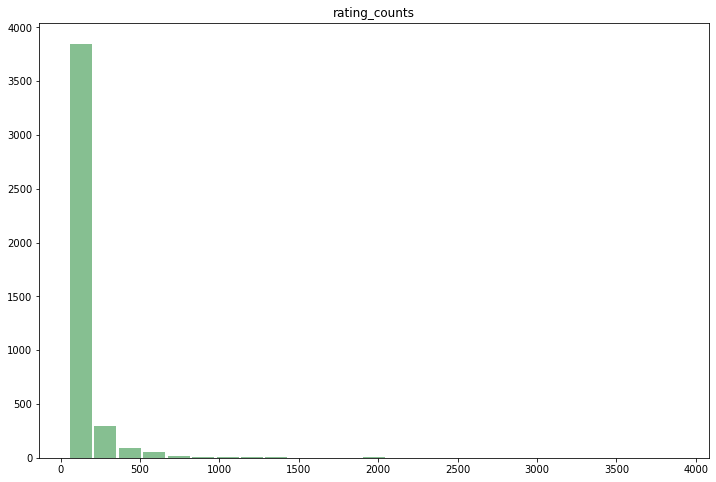

In [59]:
# Shape of the data
ratings_gt_50.hist(column = 'rating_counts', range=(50,3900) , bins=25, grid=False, figsize=(12,8), color='#86bf91', zorder=2, rwidth=0.9)
# plt.xticks(np.arange(0, 4000, 100))

In [60]:
merged_df_impute3a.describe()['score'].T

count    1000000.000000
mean           8.009720
std            2.563093
min            0.000000
25%            8.000000
50%            9.000000
75%           10.000000
max           10.000000
Name: score, dtype: float64

In [61]:
#Find the minimum and maximum ratings
print('Minimum rating is: %d' %(merged_df_impute3a.score.min()))
print('Maximum rating is: %d' %(merged_df_impute3a.score.max()))

Minimum rating is: 0
Maximum rating is: 10


/Users/kishorekumarg/opt/anaconda3/lib/python3.7/site-packages/seaborn/categorical.py:3714: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
/Users/kishorekumarg/opt/anaconda3/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


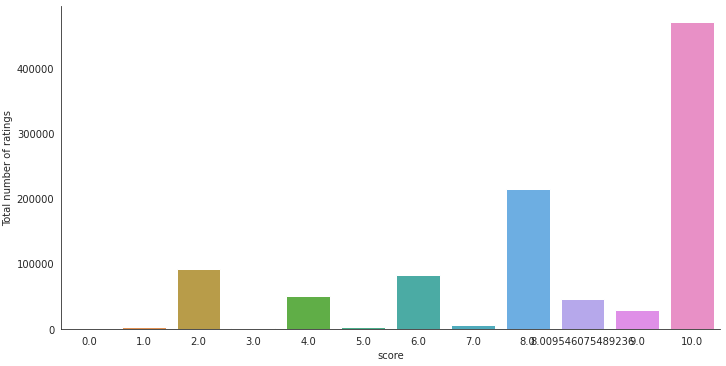

In [62]:
# Check the distribution of the rating
with sns.axes_style('white'):
    g = sns.factorplot("score", data=merged_df_impute3a, aspect=2.0,kind='count')
    g.set_ylabels("Total number of ratings")

In [63]:
print("Total data ")
print("-"*50)
print("\nTotal no of ratings :",merged_df_impute3a.shape[0])
print("Total No of Users   :", len(np.unique(merged_df_impute3a.author)))
print("Total No of products  :", len(np.unique(merged_df_impute3a.product)))

Total data 
--------------------------------------------------

Total no of ratings : 1000000
Total No of Users   : 618293
Total No of products  : 1


In [64]:
#Analysis of rating given by the user 

no_of_rated_products_per_user = merged_df_impute3a.groupby(by='author')['score'].count().sort_values(ascending=False)

no_of_rated_products_per_user.head()

author
Amazon Customer    57577
Cliente Amazon     14452
e-bit               6498
Client d'Amazon     5804
Amazon Kunde        3532
Name: score, dtype: int64

In [65]:
no_of_rated_products_per_user.describe()

count    618293.000000
mean          1.617356
std          76.764472
min           1.000000
25%           1.000000
50%           1.000000
75%           1.000000
max       57577.000000
Name: score, dtype: float64

In [66]:
quantiles = no_of_rated_products_per_user.quantile(np.arange(0,1.01,0.01), interpolation='higher')

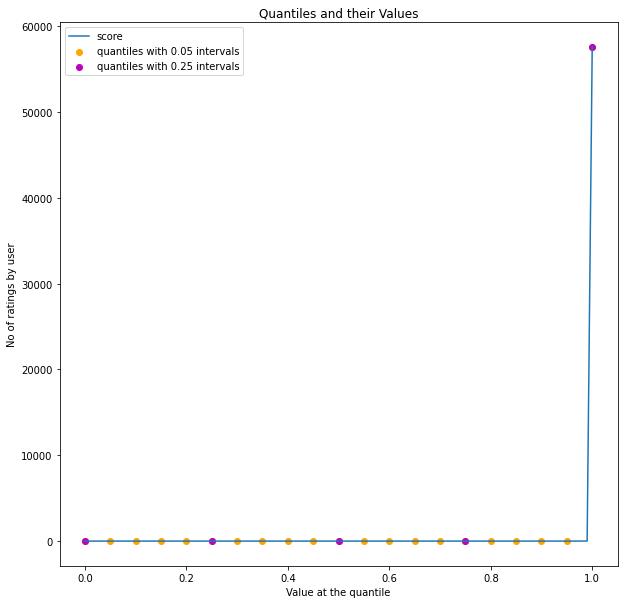

In [67]:
plt.figure(figsize=(10,10))
plt.title("Quantiles and their Values")
quantiles.plot()
# quantiles with 0.05 difference
plt.scatter(x=quantiles.index[::5], y=quantiles.values[::5], c='orange', label="quantiles with 0.05 intervals")
# quantiles with 0.25 difference
plt.scatter(x=quantiles.index[::25], y=quantiles.values[::25], c='m', label = "quantiles with 0.25 intervals")
plt.ylabel('No of ratings by user')
plt.xlabel('Value at the quantile')
plt.legend(loc='best')
plt.show()

In [68]:
print('\n No of rated product more than 50 per user : {}\n'.format(sum(no_of_rated_products_per_user >= 50)) )


 No of rated product more than 50 per user : 697



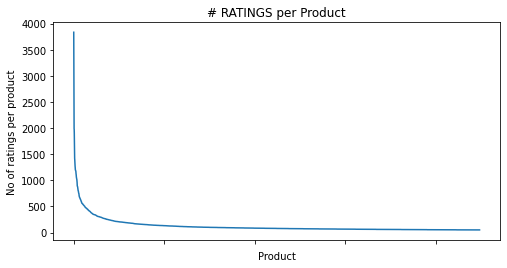

In [69]:
# Build a popularity based model and recommend top 5 mobile phones.
#Getting the new dataframe which contains users who has given 50 or more ratings

new_df=merged_df_impute3a.groupby("product").filter(lambda x:x['score'].count() >=50)

no_of_ratings_per_product = new_df.groupby(by='product')['score'].count().sort_values(ascending=False)

fig = plt.figure(figsize=plt.figaspect(.5))
ax = plt.gca()
plt.plot(no_of_ratings_per_product.values)
plt.title('# RATINGS per Product')
plt.xlabel('Product')
plt.ylabel('No of ratings per product')
ax.set_xticklabels([])

plt.show()

In [70]:
#Average rating of the product 

new_df.groupby('product')['score'].mean().head()

product
3100 / 3120                                                                                                                                            7.684378
3220                                                                                                                                                   8.557876
5.5-Inch Unlocked Lenovo A850 3G Smartphone-(960x540) Quad Core 4GB MT6582m 1331MHz Android 4.2 Dual Camera +Dual SIM -Black (Rooted + Google Play)    6.987654
6126 / 6131 / 6133                                                                                                                                     7.971519
6682 / 6681                                                                                                                                            8.559646
Name: score, dtype: float64

In [71]:
new_df.groupby('product')['score'].mean().sort_values(ascending=False).head()

product
Motorola Smartphone Motorola Moto X Desbloqueado Preto Android 4.2.2 Câmera 10MP e Frontal 2MP Memória Interna de 16GB GSM                       10.0
Samsung Smartphone Galaxy Win Duos Branco Desbloqueado Dual Chip Câmera 5MP Processador Quad Core 1.2 Ghz Android 4.1 3G Wi- Fi e Memória 8GB    10.0
Apple iPhone 4S Branco 8GB - Apple                                                                                                               10.0
Motorola Smartphone Motorola Novo Moto G DTV Colors Dual Chip XT 1069 Desbloqueado Android 4.4 Tela 5 16GB 3G Wi-Fi Câmera de 8MP - Preto        10.0
Nokia Smartphone Nokia Lumia 520 Desbloqueado Oi Preto Windows Phone 8 Câmera 5MP 3G Wi-Fi Memória Interna 8G GPS                                10.0
Name: score, dtype: float64

In [72]:
#Total no of rating for product

new_df.groupby('product')['score'].count().sort_values(ascending=False).head()

product
Lenovo Vibe K4 Note (White,16GB)     3835
Lenovo Vibe K4 Note (Black, 16GB)    3275
OnePlus 3 (Graphite, 64 GB)          3097
OnePlus 3 (Soft Gold, 64 GB)         2673
Samsung Galaxy Express I8730         1989
Name: score, dtype: int64

In [73]:
ratings_mean_count = pd.DataFrame(new_df.groupby('product')['score'].mean())

In [74]:
ratings_mean_count['rating_counts'] = pd.DataFrame(new_df.groupby('product')['score'].count())

In [75]:
ratings_mean_count.head()

,score,rating_counts
product,,
3100 / 3120,7.684378,57
3220,8.557876,52
5.5-Inch Unlocked Lenovo A850 3G Smartphone-(960x540) Quad Core 4GB MT6582m 1331MHz Android 4.2 Dual Camera +Dual SIM -Black (Rooted + Google Play),6.987654,81
6126 / 6131 / 6133,7.971519,105
6682 / 6681,8.559646,59


In [76]:
ratings_mean_count['rating_counts'].max()

3835

<AxesSubplot:>

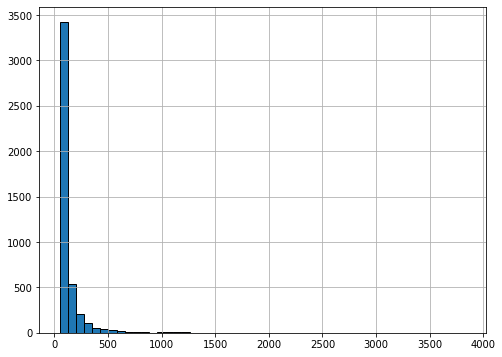

In [77]:
plt.figure(figsize=(8,6))
plt.rcParams['patch.force_edgecolor'] = True
ratings_mean_count['rating_counts'].hist(bins=50)

<AxesSubplot:>

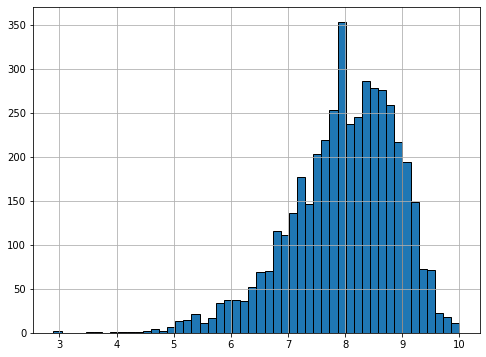

In [78]:
plt.figure(figsize=(8,6))
plt.rcParams['patch.force_edgecolor'] = True
ratings_mean_count['score'].hist(bins=50)

<Figure size 576x432 with 0 Axes>

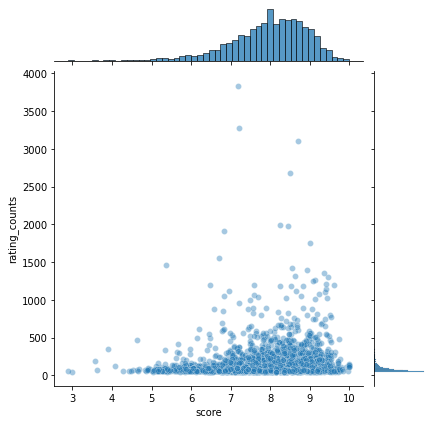

In [79]:
plt.figure(figsize=(8,6))
plt.rcParams['patch.force_edgecolor'] = True
sns.jointplot(x='score', y='rating_counts', data=ratings_mean_count, alpha=0.4)

<AxesSubplot:xlabel='product'>

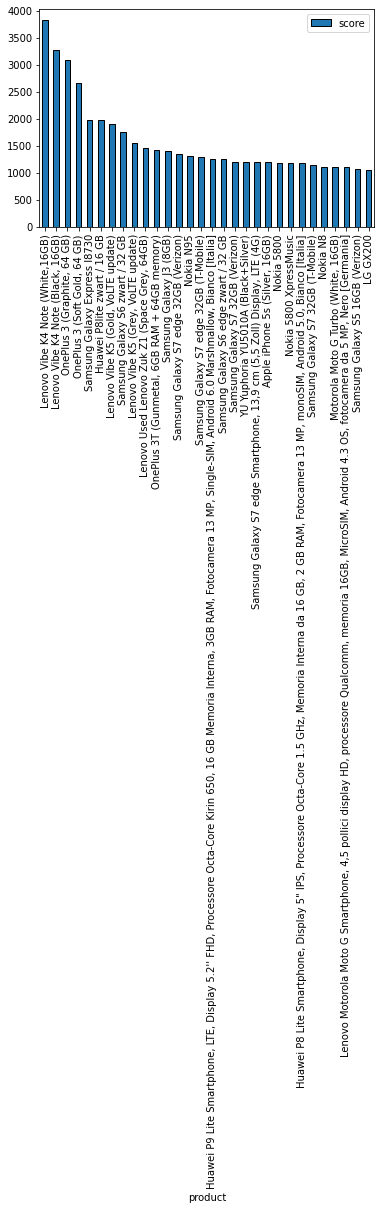

In [80]:
popular_products = pd.DataFrame(new_df.groupby('product')['score'].count())
most_popular = popular_products.sort_values('score', ascending=False)
most_popular.head(30).plot(kind = "bar")

In [81]:
pip install surprise

Note: you may need to restart the kernel to use updated packages.


In [82]:
# #Reading the dataset
# reader = Reader(rating_scale=(1, 10))
# data = Dataset.load_from_df(new_df,reader)

In [83]:
merged_df_impute3b = merged_df_impute3a.copy()

In [84]:
merged_df_impute3b = merged_df_impute3b.drop(['date'], axis=1)

In [85]:
merged_df_impute3b.columns

Index(['lang', 'country', 'source', 'score', 'score_max', 'extract', 'author',
       'product'],
      dtype='object')

In [86]:
# TRY 3

In [87]:
# Collaborative filtering with user user & Item Item based filtering
merged_df_impute3b.head()

,lang,country,source,score,score_max,extract,author,product
52717,ru,ru,Yandex,8.0,10.0,Ничего сверх крутого в apple для себя не откры...,Гундарев Сергей,Apple iPhone 5S 32Gb
233874,de,de,Amazon,10.0,10.0,Handy ladet nur wenn ich Akku herausnehme wie ...,Rosemarie Boeshans,"Samsung Galaxy S3 mini I8190 Smartphone (10,2 ..."
171116,it,it,Amazon,10.0,10.0,"Ottimo prodotto, a questo prezzo non esiste ni...",Federico Minetti,"Honor 4X Smartphone 4G, Display 5.5 Pollici, P..."
18964,pt,br,Kabum,10.0,10.0,Òtima relação custo benefício.,Eugênio,Smartphone Samsung Galaxy J1 Mini Duos SM-J105...
53871,en,us,Amazon,2.0,10.0,The phone that they send to you not correspond...,davisdev,"HTC One X Unlocked Gsm Phone, 16GB, Gray"


In [88]:
merged_df_impute3c = pd.DataFrame(merged_df_impute3b, columns = ['product', 'score', 'author'])

In [89]:
merged_df_impute3c.head()

,product,score,author
52717,Apple iPhone 5S 32Gb,8.0,Гундарев Сергей
233874,"Samsung Galaxy S3 mini I8190 Smartphone (10,2 ...",10.0,Rosemarie Boeshans
171116,"Honor 4X Smartphone 4G, Display 5.5 Pollici, P...",10.0,Federico Minetti
18964,Smartphone Samsung Galaxy J1 Mini Duos SM-J105...,10.0,Eugênio
53871,"HTC One X Unlocked Gsm Phone, 16GB, Gray",2.0,davisdev


In [90]:
merged_df_impute3c.shape

(1000000, 3)

In [91]:
merged_df_impute3c.describe().transpose

<bound method DataFrame.transpose of                 score
count  1000000.000000
mean         8.009720
std          2.563093
min          0.000000
25%          8.000000
50%          9.000000
75%         10.000000
max         10.000000>

In [92]:
merged_df_impute3c.nunique()

product     56084
score          12
author     618293
dtype: int64

In [93]:
merged_df_impute3c.score.unique()

array([ 8.        , 10.        ,  2.        ,  6.        ,  8.00954608,
        9.        ,  4.        ,  7.        ,  1.        ,  3.        ,
        5.        ,  0.        ])

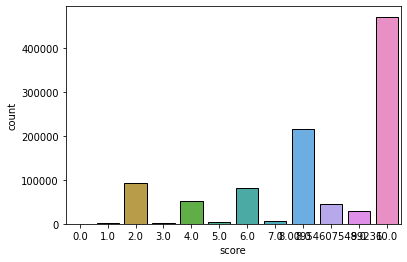

In [94]:
sns.countplot(data=merged_df_impute3c , x='score')
plt.show()

In [95]:
counts1 = merged_df_impute3c['score'].value_counts()
# print(counts1)
merged_df_impute3d = merged_df_impute3c[merged_df_impute3c['score'].isin(counts1[counts1 >= 100].index)]

In [96]:
merged_df_impute3c.head()

,product,score,author
52717,Apple iPhone 5S 32Gb,8.0,Гундарев Сергей
233874,"Samsung Galaxy S3 mini I8190 Smartphone (10,2 ...",10.0,Rosemarie Boeshans
171116,"Honor 4X Smartphone 4G, Display 5.5 Pollici, P...",10.0,Federico Minetti
18964,Smartphone Samsung Galaxy J1 Mini Duos SM-J105...,10.0,Eugênio
53871,"HTC One X Unlocked Gsm Phone, 16GB, Gray",2.0,davisdev


In [97]:
merged_df_impute3e = merged_df_impute3c.drop_duplicates()

In [98]:
merged_df_impute3e.shape

(907088, 3)

In [99]:
merged_df_impute3e.head()

,product,score,author
52717,Apple iPhone 5S 32Gb,8.0,Гундарев Сергей
233874,"Samsung Galaxy S3 mini I8190 Smartphone (10,2 ...",10.0,Rosemarie Boeshans
171116,"Honor 4X Smartphone 4G, Display 5.5 Pollici, P...",10.0,Federico Minetti
18964,Smartphone Samsung Galaxy J1 Mini Duos SM-J105...,10.0,Eugênio
53871,"HTC One X Unlocked Gsm Phone, 16GB, Gray",2.0,davisdev


In [100]:
merged_df_impute3f = merged_df_impute3e.sample(n=5000, random_state = 612)

In [101]:
merged_df_impute3f.head()

,product,score,author
342268,"Palm Treo Pro Unlocked Phone with 2 MP Camera,...",10.0,"D. Bobke ""New Normal"""
243587,Samsung E1080,8.0,cher-i2012
350609,"Samsung Galaxy S5 Smartphone (5,1 Zoll (12,9 c...",10.0,Kagi
31699,"BlackBerry Bold 9790, Display 2.45 Pollici, Co...",10.0,Agostino
287979,"BLU Studio 5.0 LTE, 8MP, ( 4GB+1GB RAM)- Facto...",10.0,David


In [102]:
merged_df_impute3f.shape

(5000, 3)

In [103]:
merged_df_impute3f.describe()

,score
count,5000.000000
mean,8.046991
std,2.523503
min,0.000000
25%,8.000000
50%,9.000000
75%,10.000000
max,10.000000


In [104]:
ratings_explicit = merged_df_impute3f.copy()

In [105]:
ratings_matrix = ratings_explicit.pivot(index='author', columns='product', values='score').fillna(0)

In [106]:
userID = ratings_matrix.index
ISBN = ratings_matrix.columns
print(ratings_matrix.shape)
ratings_matrix.head()

(4685, 3934)


product,"2014 Newest THL T6 Pro 5.0"" Android 4.4 Unlocked 3G Smartphone -- IPS Touch Screen MT6592M Octa-Core 1.4GHz GSM...",2015 Newest CUBOT X9 5.0'' Octa Core Android 4.4 Kitkat OS Unlocked 3G Smartphone -- IPS HD Touchscreen HotKnot MTK6592 Dual SIM Dual Standby Mobile Phone 2G RAM 16G ROM WIFI OTG GPS Finger Gesture Air Gesture Cellphone 3G Phablet (Golden),5.5-Inch Unlocked Lenovo A850 3G Smartphone-(960x540) Quad Core 4GB MT6582m 1331MHz Android 4.2 Dual Camera +Dual SIM -Black (Rooted + Google Play),6126 / 6131 / 6133,6305i,6650 fold,7130e,8801 / 8800,?????????????? ?????????????? Nokia 808 PureView Black,?????????????? ?????????????? Nokia Asha 302 Golden light,...,Сотовый телефон Huawei Y6,Сотовый телефон Nokia Lumia 610 Black,Сотовый телефон Nokia N8 Blue,Сотовый телефон Nokia N8 Dark Grey,Сотовый телефон Nokia X1 Red,Телефон LG E450 Optimus L5 II Black,Телефон LG E510 Optimus Hub Black,טלפון סלולרי LG Nexus 5 16GB D821,טלפון סלולרי Samsung Galaxy S6 SM-G920F 64GB,טלפון סלולרי Samsung Galaxy S7 Edge SM-G935F 32GB
author,,,,,,,,,,,,,,,,,,,,,
#,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
&#214;mar D.,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
--RODRIGO--,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
-X-,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [107]:
# Generate the predicted ratings using SVD with no.of singular values to be 50
from scipy.sparse.linalg import svds
U, sigma, Vt = svds(ratings_matrix, k = 50)

In [108]:
sigma = np.diag(sigma)
all_user_predicted_ratings = np.dot(np.dot(U, sigma), Vt) 
preds_df = pd.DataFrame(all_user_predicted_ratings, columns = ratings_matrix.columns)

In [109]:
preds_df.head()

product,"2014 Newest THL T6 Pro 5.0"" Android 4.4 Unlocked 3G Smartphone -- IPS Touch Screen MT6592M Octa-Core 1.4GHz GSM...",2015 Newest CUBOT X9 5.0'' Octa Core Android 4.4 Kitkat OS Unlocked 3G Smartphone -- IPS HD Touchscreen HotKnot MTK6592 Dual SIM Dual Standby Mobile Phone 2G RAM 16G ROM WIFI OTG GPS Finger Gesture Air Gesture Cellphone 3G Phablet (Golden),5.5-Inch Unlocked Lenovo A850 3G Smartphone-(960x540) Quad Core 4GB MT6582m 1331MHz Android 4.2 Dual Camera +Dual SIM -Black (Rooted + Google Play),6126 / 6131 / 6133,6305i,6650 fold,7130e,8801 / 8800,?????????????? ?????????????? Nokia 808 PureView Black,?????????????? ?????????????? Nokia Asha 302 Golden light,...,Сотовый телефон Huawei Y6,Сотовый телефон Nokia Lumia 610 Black,Сотовый телефон Nokia N8 Blue,Сотовый телефон Nokia N8 Dark Grey,Сотовый телефон Nokia X1 Red,Телефон LG E450 Optimus L5 II Black,Телефон LG E510 Optimus Hub Black,טלפון סלולרי LG Nexus 5 16GB D821,טלפון סלולרי Samsung Galaxy S6 SM-G920F 64GB,טלפון סלולרי Samsung Galaxy S7 Edge SM-G935F 32GB
0,-2.992313e-33,-6.676688e-36,9.207298e-34,-3.035021e-33,-8.999800e-34,2.304837e-33,3.079362e-33,-4.414320e-34,1.036231e-33,-3.268208e-33,...,-2.646875e-33,-3.066112e-33,-2.565003e-33,1.053934e-33,2.063674e-33,1.283871e-33,1.033377e-33,1.294308e-34,2.386072e-33,7.153442e-34
1,-2.123871e-34,-1.039843e-36,2.451838e-31,-6.325714e-33,-8.557533e-35,-1.174691e-34,5.617858e-33,-1.199366e-32,1.587758e-33,-1.013998e-33,...,-3.745980e-34,-3.489665e-33,-2.475410e-33,1.432091e-33,3.403685e-33,2.394997e-34,2.582602e-33,7.182102e-33,3.026923e-34,5.341035e-35
2,1.681451e-34,3.324628e-37,2.007612e-33,9.134816e-34,4.570646e-35,-8.468640e-35,-1.023299e-33,7.166454e-34,-2.846875e-34,1.143383e-33,...,1.053694e-34,9.778491e-34,7.277877e-34,-2.476005e-34,-5.477154e-34,-6.626100e-35,-3.381362e-34,-1.026520e-33,-9.499460e-35,-2.782846e-35
3,1.566412e-33,3.485273e-36,-2.594252e-34,1.647606e-33,4.706700e-34,-1.203725e-33,-1.701055e-33,2.581162e-34,-5.708167e-34,2.115273e-33,...,1.381283e-33,1.688238e-33,1.420534e-33,-5.875991e-34,-1.143410e-33,-6.687990e-34,-5.697241e-34,-4.645372e-35,-1.244872e-33,-3.740994e-34
4,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00


In [110]:
ratings_matrix.head()

product,"2014 Newest THL T6 Pro 5.0"" Android 4.4 Unlocked 3G Smartphone -- IPS Touch Screen MT6592M Octa-Core 1.4GHz GSM...",2015 Newest CUBOT X9 5.0'' Octa Core Android 4.4 Kitkat OS Unlocked 3G Smartphone -- IPS HD Touchscreen HotKnot MTK6592 Dual SIM Dual Standby Mobile Phone 2G RAM 16G ROM WIFI OTG GPS Finger Gesture Air Gesture Cellphone 3G Phablet (Golden),5.5-Inch Unlocked Lenovo A850 3G Smartphone-(960x540) Quad Core 4GB MT6582m 1331MHz Android 4.2 Dual Camera +Dual SIM -Black (Rooted + Google Play),6126 / 6131 / 6133,6305i,6650 fold,7130e,8801 / 8800,?????????????? ?????????????? Nokia 808 PureView Black,?????????????? ?????????????? Nokia Asha 302 Golden light,...,Сотовый телефон Huawei Y6,Сотовый телефон Nokia Lumia 610 Black,Сотовый телефон Nokia N8 Blue,Сотовый телефон Nokia N8 Dark Grey,Сотовый телефон Nokia X1 Red,Телефон LG E450 Optimus L5 II Black,Телефон LG E510 Optimus Hub Black,טלפון סלולרי LG Nexus 5 16GB D821,טלפון סלולרי Samsung Galaxy S6 SM-G920F 64GB,טלפון סלולרי Samsung Galaxy S7 Edge SM-G935F 32GB
author,,,,,,,,,,,,,,,,,,,,,
#,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
&#214;mar D.,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
--RODRIGO--,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
-X-,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [111]:
user_id = 2

In [112]:
userID = ratings_matrix.iloc[user_id-1, :].name
userID

'&#214;mar D.'

In [113]:
preds_df.shape

(4685, 3934)

In [114]:
sorted_user_predictions = preds_df.iloc[user_id].sort_values(ascending=False)

In [115]:
len(sorted_user_predictions)

3934

In [116]:
# Get all user interacted products
user_data = ratings_explicit[ratings_explicit.author == (userID)]

In [117]:
user_data.head()

,product,score,author
34212,"Samsung Galaxy S7 Smartphone, 12,9 cm (5,1 Zol...",10.0,&#214;mar D.


In [118]:
user_data.shape

(1, 3)

In [119]:
a = user_data.product()

In [120]:
merged_df_impute3e
book_data = merged_df_impute3e[merged_df_impute3e['product'].isin(user_data['product'])]

In [121]:
book_data.shape

(305, 3)

In [122]:
book_data.head()

,product,score,author
33303,"Samsung Galaxy S7 Smartphone, 12,9 cm (5,1 Zol...",10.0,Yvonne K.
33237,"Samsung Galaxy S7 Smartphone, 12,9 cm (5,1 Zol...",10.0,einer Kundin
34067,"Samsung Galaxy S7 Smartphone, 12,9 cm (5,1 Zol...",10.0,Paul W.
37580,"Samsung Galaxy S7 Smartphone, 12,9 cm (5,1 Zol...",10.0,einem Kunden
35466,"Samsung Galaxy S7 Smartphone, 12,9 cm (5,1 Zol...",10.0,Helen S.


In [123]:
user_full_info = user_data.merge(book_data)

In [124]:
user_full_info.head()

,product,score,author
0,"Samsung Galaxy S7 Smartphone, 12,9 cm (5,1 Zol...",10.0,&#214;mar D.


In [125]:
print ('User {0} has already rated {1} movies.'.format(userID, user_full_info.shape[0]))

User &#214;mar D. has already rated 1 movies.


In [126]:
recommendations = (merged_df_impute3e[~merged_df_impute3e['product'].isin(user_full_info['product'])].
                   merge(pd.DataFrame(sorted_user_predictions).reset_index(), how = 'left', left_on = 'product'
                         ,right_on = 'product')).rename(columns = {user_id: 'Predictions'})

In [127]:
recommendations.shape

(906783, 4)

In [128]:
recommendations.head()

,product,score,author,Predictions
0,Apple iPhone 5S 32Gb,8.0,Гундарев Сергей,4.357142e-35
1,"Samsung Galaxy S3 mini I8190 Smartphone (10,2 ...",10.0,Rosemarie Boeshans,-7.670666e-34
2,"Honor 4X Smartphone 4G, Display 5.5 Pollici, P...",10.0,Federico Minetti,NaN
3,Smartphone Samsung Galaxy J1 Mini Duos SM-J105...,10.0,Eugênio,NaN
4,"HTC One X Unlocked Gsm Phone, 16GB, Gray",2.0,davisdev,NaN


In [129]:
# get recommendation

recommendations.sort_values('Predictions', ascending = False).iloc[:10, :]

,product,score,author,Predictions
22103,Samsung Galaxy S6 edge+ 32GB (T-Mobile),10.0,jchdez,7.223358e-17
746093,Samsung Galaxy S6 edge+ 32GB (T-Mobile),10.0,Dunkingirl,7.223358e-17
882288,Samsung Galaxy S6 edge+ 32GB (T-Mobile),10.0,Imesa10,7.223358e-17
469121,Samsung Galaxy S6 edge+ 32GB (T-Mobile),8.0,nikkibabyblue,7.223358e-17
154066,Samsung Galaxy S6 edge+ 32GB (T-Mobile),10.0,Kresc,7.223358e-17
408494,Samsung Galaxy S6 edge+ 32GB (T-Mobile),10.0,sean7007,7.223358e-17
422512,Samsung Galaxy S6 edge+ 32GB (T-Mobile),10.0,Married,7.223358e-17
587496,Samsung Galaxy S6 edge+ 32GB (T-Mobile),9.0,J76jparks,7.223358e-17
48944,Samsung Galaxy S6 edge+ 32GB (T-Mobile),10.0,AZpackerfan24,7.223358e-17
653353,Samsung Galaxy S6 edge+ 32GB (T-Mobile),10.0,Detroit66,7.223358e-17


In [1]:
# /bkup
recommendations.head()

NameError: name 'recommendations' is not defined